In [32]:
%pylab inline
import pandas as pd
from scipy import stats

import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product
 
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

Populating the interactive namespace from numpy and matplotlib


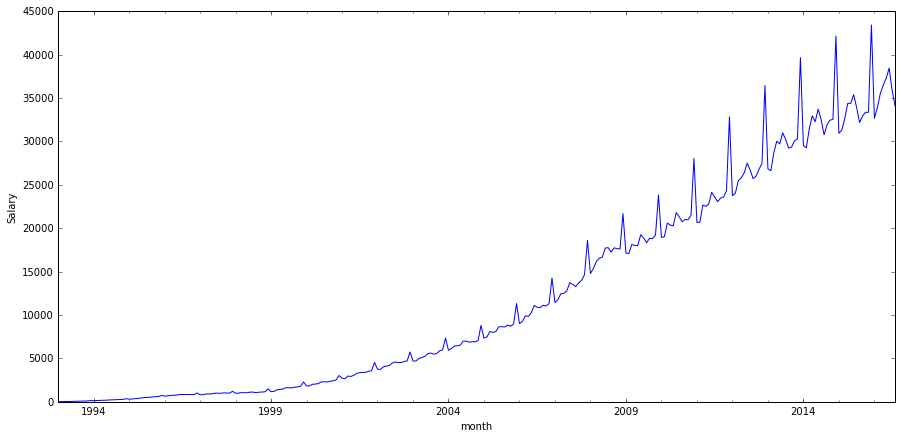

In [33]:
salary = pd.read_csv('WAG_C_M.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
plt.figure(figsize(15,7))
salary.WAG_C_M.plot()
plt.ylabel('Salary')
pylab.show()

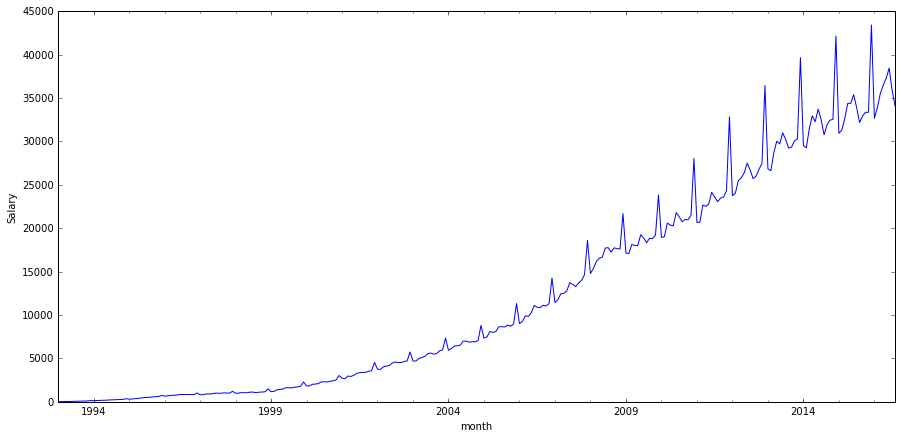

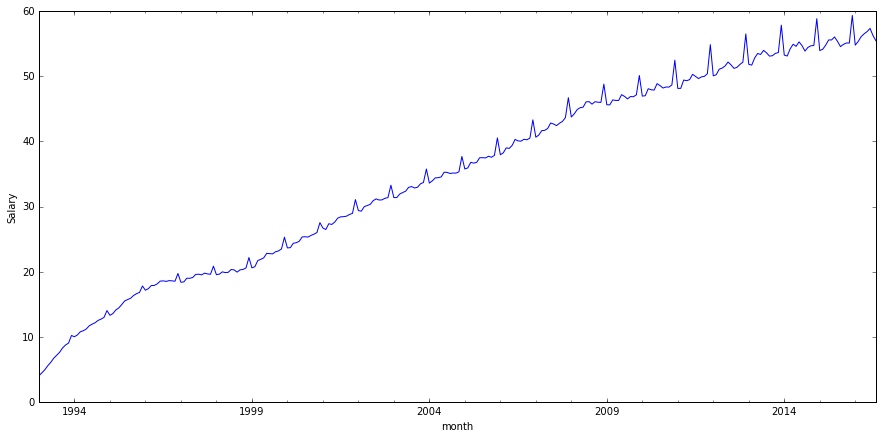

In [34]:
salary['WAG_C_M_boxcox'] ,lmbda = stats.boxcox(salary.WAG_C_M)
salary['WAG_C_M_boxcox_invert'] = invboxcox(salary['WAG_C_M_boxcox'],lmbda)
plt.figure(figsize(15,7))
salary.WAG_C_M_boxcox_invert.plot()
plt.ylabel('Salary')
pylab.show()
plt.figure(figsize(15,7))
salary.WAG_C_M_boxcox.plot()
plt.ylabel('Salary')
pylab.show()

In [35]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


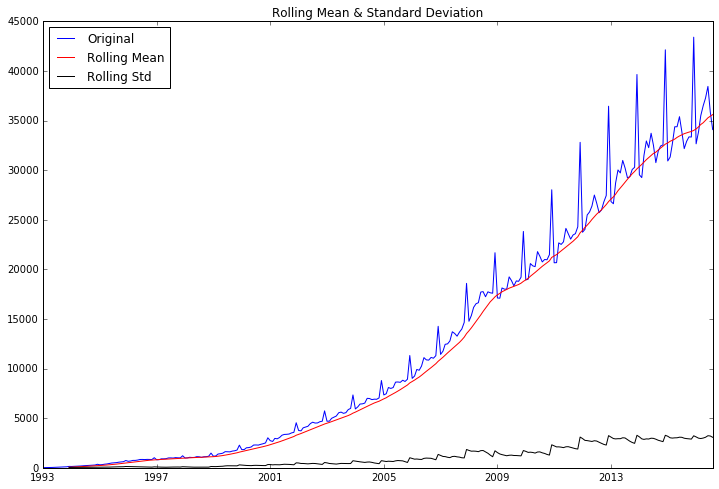

Results of Dickey-Fuller Test:
Test Statistic                   0.813411
p-value                          0.991850
#Lags Used                      14.000000
Number of Observations Used    269.000000
Critical Value (5%)             -2.872345
Critical Value (1%)             -3.454896
Critical Value (10%)            -2.572528
dtype: float64


In [36]:
test_stationarity(salary.WAG_C_M)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


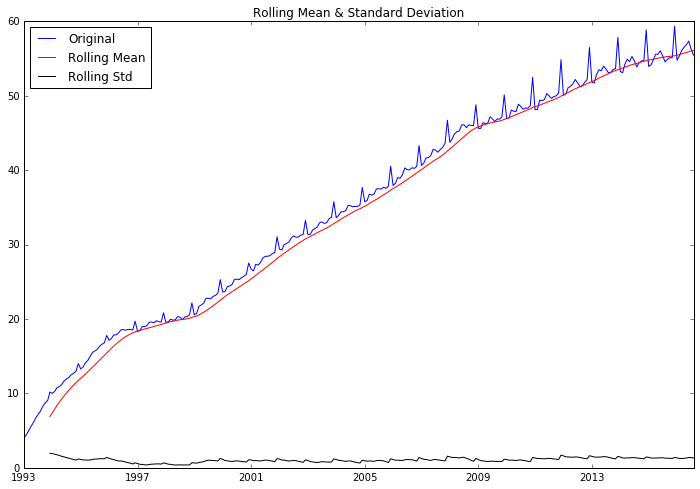

Results of Dickey-Fuller Test:
Test Statistic                  -1.144754
p-value                          0.696899
#Lags Used                      13.000000
Number of Observations Used    270.000000
Critical Value (5%)             -2.872305
Critical Value (1%)             -3.454804
Critical Value (10%)            -2.572506
dtype: float64


In [37]:
salary['WAG_C_M_box'], lmbda = stats.boxcox(salary.WAG_C_M)
test_stationarity(salary.WAG_C_M_box)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


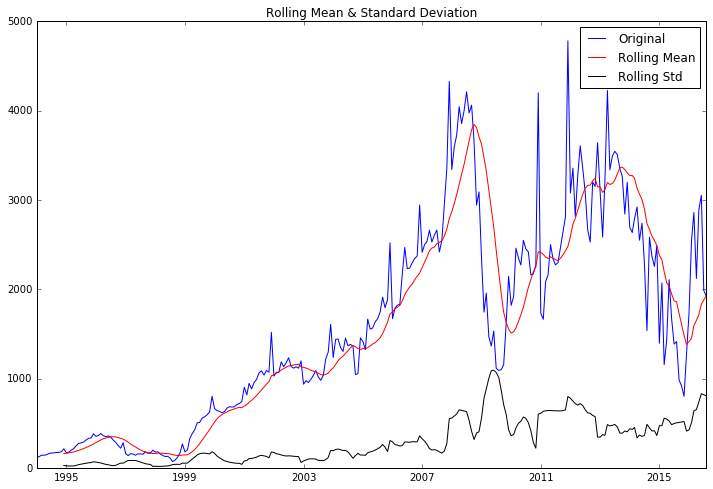

Results of Dickey-Fuller Test:
Test Statistic                  -1.474035
p-value                          0.546315
#Lags Used                      15.000000
Number of Observations Used    256.000000
Critical Value (5%)             -2.872897
Critical Value (1%)             -3.456155
Critical Value (10%)            -2.572822
dtype: float64


In [38]:
salary['WAG_C_M_box_seasonDiff'] = salary.WAG_C_M - salary.WAG_C_M.shift(12)
test_stationarity(salary.WAG_C_M_box_seasonDiff[12:])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


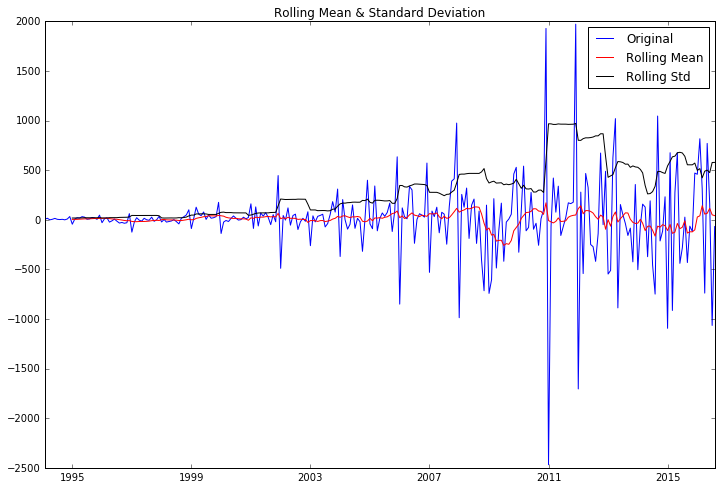

Results of Dickey-Fuller Test:
Test Statistic                -6.111926e+00
p-value                        9.288290e-08
#Lags Used                     1.400000e+01
Number of Observations Used    2.560000e+02
Critical Value (5%)           -2.872897e+00
Critical Value (1%)           -3.456155e+00
Critical Value (10%)          -2.572822e+00
dtype: float64


In [39]:
salary['WAG_C_M_box_seasonDiff_diff'] = salary.WAG_C_M_box_seasonDiff - salary.WAG_C_M_box_seasonDiff.shift(1)
test_stationarity(salary.WAG_C_M_box_seasonDiff_diff[13:])

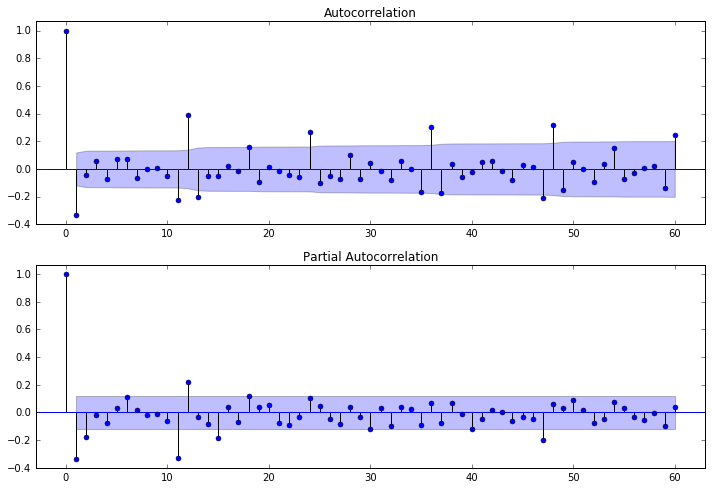

In [40]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(salary.WAG_C_M_box_seasonDiff_diff[13:], lags=60, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(salary.WAG_C_M_box_seasonDiff_diff[13:], lags=60, ax=ax2)

In [41]:
salary.head()

,WAG_C_M,WAG_C_M_boxcox,WAG_C_M_boxcox_invert,WAG_C_M_box,WAG_C_M_box_seasonDiff,WAG_C_M_box_seasonDiff_diff
month,,,,,,
1993-01-01,15.3,3.990393,15.3,3.990393,NaN,NaN
1993-02-01,19.1,4.458758,19.1,4.458758,NaN,NaN
1993-03-01,23.6,4.931635,23.6,4.931635,NaN,NaN
1993-04-01,30.6,5.549430,30.6,5.549430,NaN,NaN
1993-05-01,37.5,6.063406,37.5,6.063406,NaN,NaN


In [53]:
q=1
Q=1
p=1
P=1
d=1
D=1
mod = sm.tsa.statespace.SARIMAX(salary.WAG_C_M_box, order=(p,d,q), seasonal_order=(P,Q,Q,12)).fit(disp=-1) 
print mod.summary()

                                 Statespace Model Results                                 
Dep. Variable:                        WAG_C_M_box   No. Observations:                  284
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   3.857
Date:                            Thu, 06 Oct 2016   AIC                              2.285
Time:                                    16:10:53   BIC                             20.530
Sample:                                01-01-1993   HQIC                             9.600
                                     - 08-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2712      0.406     -0.669      0.504      -1.066       0.524
ma.L1          0.1152      0.404   

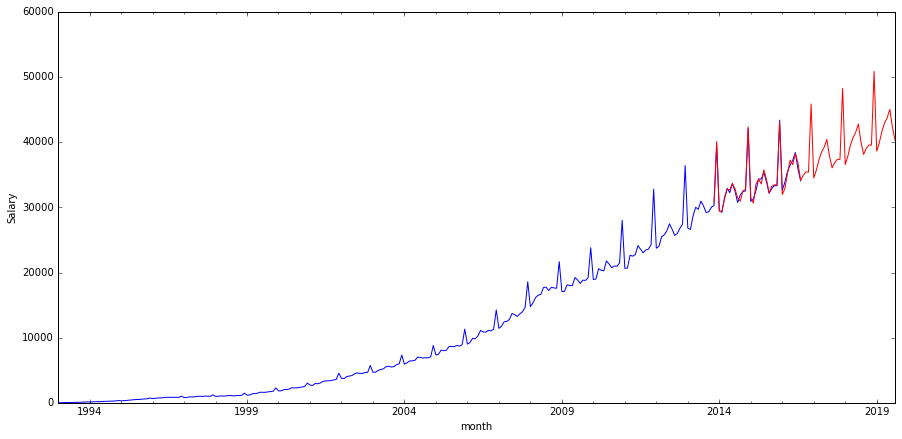

In [54]:
salary2 = salary[['WAG_C_M']]
date_list = [datetime.datetime.strptime("2016-09-01", "%Y-%m-%d") + relativedelta(months=x) for x in range(0,36)]
future = pd.DataFrame(index=date_list, columns= salary2.columns)
salary2 = pd.concat([salary2, future])
salary2['forecast'] = invboxcox(mod.predict(start=250, end=320), lmbda)
plt.figure(figsize(15,7))
salary.WAG_C_M.plot()
salary2.forecast.plot(color='r')
plt.ylabel('Salary')
pylab.show()

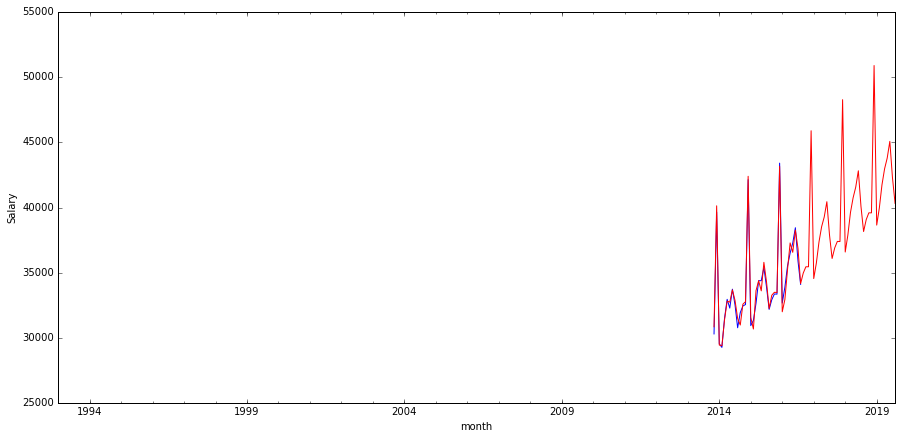

In [55]:
plt.figure(figsize(15,7))
salary.WAG_C_M[250:].plot()
salary2.forecast.plot(color='r')
plt.ylabel('Salary')
pylab.show()